In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

[[Model]]
    Model(ran_sev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 32
    # data points      = 3
    # variables        = 2
    chi-square         = 4.4799e-10
    reduced chi-square = 4.4799e-10
    Akaike info crit   = -63.8745874
    Bayesian info crit = -65.6773628
    R-squared          = 0.86565746
[[Variables]]
    D:  8.1318e-10 +/- 0.15562374 (19137651855.75%) (init = 1e-10)
    C:  2.2392e-04 +/- 21426.6466 (9568825698.00%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(D, C) = -1.000
   Current Peak (A)  Scan Rate (V/s)
0          0.000028            0.001
1          0.000051            0.002
2          0.000107            0.005
   Current Peak (A)  Scan Rate (V/s)
0          0.000027            0.001
1          0.000051            0.002
2          0.000110            0.005


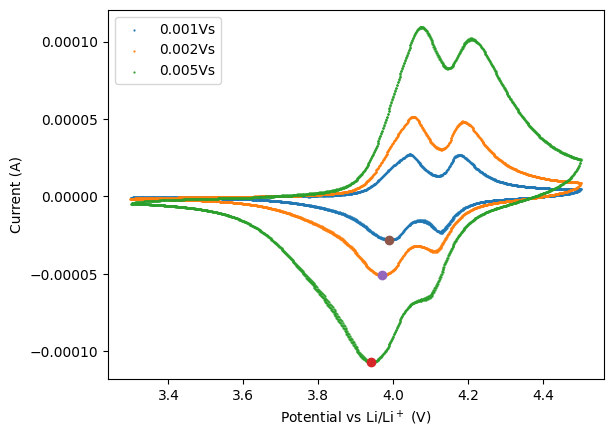

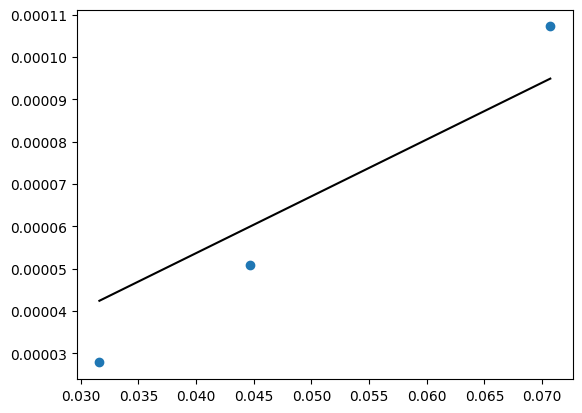

In [4]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\PLSA Pt\01\ScanRate'
files = [os.path.join(path, i) for i in os.listdir(path)]
col = ['Potential vs Li/Li$^+$ (V)', 'Current (A)', 'Charge (C)', 'Time (s)']
col2 = ['Current Peak (A)', 'Scan Rate (V/s)']
area = 0.785
F = 96485 # C / mol
R = 8.31446261815324 # J /(K * mol)
T = 300
def ran_sev(v, D, C):
    # return 2.69e5 * area * C * np.sqrt(D * v)
    return 0.4463 * F * area * C * np.sqrt((F * v * D) / (R * T))

i_p_c = pd.DataFrame(columns = col2)
i_p_a = pd.DataFrame(columns = col2)

n = 0
for i in files:    
    df = pd.read_csv(i, sep = ';', names = col, skiprows=1)
    current_peak_c = -min(df[col[1]])
    current_peak_a = max(df[col[1]])
    i_p_c.loc[n] = (current_peak_c, float(i[-13:-8]))
    i_p_a.loc[n] = (current_peak_a, float(i[-13:-8])) 
    n += 1 
    sns.scatterplot(data = df, x = col[0], y = col[1], edgecolor = None, s = 2, label = i[-13:-6])
    
gmodel = Model(ran_sev)
params = gmodel.make_params()
params['D'].set(value = 1e-10, min = 1e-20, max = 1e-8)
params['C'].set(value = 1e-4, min = 1e-6, max = 1e-3)

result = gmodel.fit(i_p_c[col2[0]], params, v = i_p_c[col2[1]])
print(result.fit_report())
print(i_p_c)
print(i_p_a)

# PLOT
# sns.scatterplot(data = df, x = col[0], y = col[1], edgecolor = None, s = 2, label = files[n][-13:-6])

plt.scatter(3.94, -0.000107)
plt.scatter(3.97, -0.000051)
plt.scatter(3.99, -0.000028)




fig, ax = plt.subplots()
plt.scatter(np.sqrt(i_p_c[col2[1]]), i_p_c[col2[0]])

plt.plot(np.sqrt(i_p_c[col2[1]]), result.best_fit, c = 'k')

In [ ]:

a = 0.4463 * F 
print(a)

43061.2555
